# **Εργαστήριο**: "Νευρωνικά Δίκτυα και Ευφυή Υπολογιστικά Συστήματα"
## **Ασκηση 1: Dataset B02**

## Α. Στοιχεία ομάδας

### **Ομάδα M.Β.11**

- Αλεξόπουλος Άγγελος, el15404
- Γιαννακούλιας Γεώργιος, el15044
- Καλντής Μιχαήλ, el15123

<!-- | Επώνυμο | Όνομα  | ΑΜ |
|-------------------------|:----------:|---------:|
| Αλεξόπουλος   | Άγγελος  | el15404 |
| Γιαννακούλιας | Γεώργιος | el15044 |
| Καλντής        | Μιχαήλ  | el15123 |
|<img width=200/> |<img width=200/> |<img width=200/> | -->


Για αρχή κάνουμε install κάποια πακέτα που είναι απαραίτητα για την συνέχεια:

In [0]:
## installations
!pip install --upgrade pip #upgrade pip package installer
!pip install --upgrade scikit-learn  #upgrade scikit-learn package
!pip install --upgrade numpy #upgrade numpy package
!pip install --upgrade pandas #upgrade pandas package
!pip install --upgrade scipy #upgrade scipy package
!pip install --upgrade tensorflow
!pip install -U imbalanced-learn


Requirement already up-to-date: pip in ./lib/python3.6/site-packages (19.3.1)
Requirement already up-to-date: scikit-learn in ./lib/python3.6/site-packages (0.22)
Requirement already up-to-date: numpy in ./lib/python3.6/site-packages (1.17.4)
Requirement already up-to-date: pandas in ./lib/python3.6/site-packages (0.25.3)
Requirement already up-to-date: scipy in ./lib/python3.6/site-packages (1.4.1)
Requirement already up-to-date: tensorflow in ./lib/python3.6/site-packages (2.0.0)
Requirement already up-to-date: imbalanced-learn in ./lib/python3.6/site-packages (0.6.1)


## Β. Εισαγωγή του dataset


#(1)
Το [dataset](http://archive.ics.uci.edu/ml/datasets/EEG+Eye+State) μας ( [εδώ](http://archive.ics.uci.edu/ml/machine-learning-databases/statlog/satimage/) για download ) έχει όνομα EEG Eye State Data Set. Περιέχει μετρήσεις από μια συνεχόμενη καταγραφή 117 δευτερολέπτων που αφορούν το μάτι. Η καταγραφή έγινε με το σύστημα Emotiv EEG Neuroheadset. Σκοπός μας είναι να εκπαιδεύσουμε έναν ταξινομητή, που με βάση κάποια χαρακτηριστικά του ματιού προβλέπει εάν το μάτι είναι ανοιχτό ή κλειστό. Τα χαρακτηριστικά δεν γνωρίζουμε ποιά είναι, γιατί έχουμε ελλειπείς πληροφορίες. Γνωρίζουμε μόνο τις τιμές των χαρακτηριστικών αυτών για κάθε χρονική στιγμή. 

In [0]:
import pandas as pd
import numpy as np
import sys

df = pd.read_csv("EEGEyeState.csv", header=None)
df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,4329.23,4009.23,4289.23,4148.21,4350.26,4586.15,4096.92,4641.03,4222.05,4238.46,4211.28,4280.51,4635.90,4393.85,0
1,4324.62,4004.62,4293.85,4148.72,4342.05,4586.67,4097.44,4638.97,4210.77,4226.67,4207.69,4279.49,4632.82,4384.10,0
2,4327.69,4006.67,4295.38,4156.41,4336.92,4583.59,4096.92,4630.26,4207.69,4222.05,4206.67,4282.05,4628.72,4389.23,0
3,4328.72,4011.79,4296.41,4155.90,4343.59,4582.56,4097.44,4630.77,4217.44,4235.38,4210.77,4287.69,4632.31,4396.41,0
4,4326.15,4011.79,4292.31,4151.28,4347.69,4586.67,4095.90,4627.69,4210.77,4244.10,4212.82,4288.21,4632.82,4398.46,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14975,4281.03,3990.26,4245.64,4116.92,4333.85,4614.36,4074.87,4625.64,4203.08,4221.54,4171.28,4269.23,4593.33,4340.51,1
14976,4276.92,3991.79,4245.13,4110.77,4332.82,4615.38,4073.33,4621.54,4194.36,4217.44,4162.56,4259.49,4590.26,4333.33,1
14977,4277.44,3990.77,4246.67,4113.85,4333.33,4615.38,4072.82,4623.59,4193.33,4212.82,4160.51,4257.95,4591.79,4339.49,1
14978,4284.62,3991.79,4251.28,4122.05,4334.36,4616.41,4080.51,4628.72,4200.00,4220.00,4165.64,4267.18,4596.41,4350.77,1


#(2, 3)
Το σύνολο των δειγμάτων μας (samples) είναι 14980 και κάθε ένα έχει πρακτικά 14 χαρακτηριστικά (features), χωρίς να συμπεριλαμβάνουμε και την ετικέτα (label) που βρίκσεται στην τελευταία στήλη. Η ετικέτα είναι δυαδική (binary), με το 0 να δηλώνει ανοιχτό μάτι ενώ το 1 κλειστό μάτι.
Όλα τα χαρακτηριστικά είναι αριθμητικά και συνεπώς διατεταγμένα.


#(4)
Το αρχικό dataset δεν περιέχει επικεφαλίδες ούτε αρίθμηση των γραμμών και των στηλών, ωστόσο στην συνέχεια προσθέτει αρίθμηση η βιβλιοθήκη pandas.

#(5)
Το [αρχείο εισόδου](http://archive.ics.uci.edu/ml/machine-learning-databases/statlog/satimage/) ήταν σε μορφή ".arff" και μέσω του τερματικού το μετατρέψαμε σε μορφή ".csv".

#(6)
Μετά από άνοιγμα του αρχείου και έλεγχο μέσα από το τερματικό παρατηρήσαμε πως το αρχείο εισόδου είναι πλήρες, δηλαδή δεν έχει απουσιάζουσες τιμές.

In [0]:
labels_df = df.iloc[:, -1:] # τα labels είναι στην τελευταία κολώνα
labels = labels_df.values.flatten()
features_df = df.iloc[:, 0:-1] # τα attributes
features = features_df.values
print(labels.shape)
print(features.shape)

(14980,)
(14980, 14)


#(7)
Το dataset είναι ισορροπημένο αφού η αναλογία ανάμεσα στις δύο κλάσεις είναι περίπου 45:55. (Η πολυπληθέστερη κλάση είναι 1.2 φορές πιο συχνή, που είναι μικρότερο από 1.5).

In [0]:
# We have 2 classes
# count frequencies of each class

labels = labels.astype(int)
frequencies = np.bincount((labels))
print('frequency of class 0: ', frequencies[0])
print('frequency of class 1: ', frequencies[1])
percentages = (frequencies / sum(frequencies))*100
print('percentage of class 0: ', percentages[0])
print('percentage of class 1: ', percentages[1])
print('percentage of class 0 over class 1: ', frequencies[0]/frequencies[1])

frequency of class 0:  8257
frequency of class 1:  6723
percentage of class 0:  55.12016021361815
percentage of class 1:  44.879839786381844
percentage of class 0 over class 1:  1.228171947047449


#(8)
Χωρίζουμε με ευκολία τα δεδομένα αφού δεν υπάρχουν απουσιάζουσες τιμές, κρατώντας 70% για εκπαίδευση (train) και 30% για έλεγχο (test).

In [0]:
#split train-test set
from sklearn.model_selection import train_test_split
train, test, train_labels, test_labels = train_test_split(features, labels, test_size=0.3)

## Γ. Baseline classification

#(1)
Συνολικά φτιάχνουμε 5 dummy classifiers, έναν k-nearest neighbors, ένα Gaussian Naive Bayes και ένα MLP.

Ξεκινάμε εκπαιδεύοντας με απλή αρχικοποίηση (χρησιμοποιόντας τις default τιμές) τους ταξινομητές και στην συνέχεια κάνουμε εκτίμηση για το test set και τυπώνουμαι confusion matrix, f1-micro average και f1-macro average.



In [0]:
import matplotlib.pyplot as plt
import itertools

# from https://www.kaggle.com/grfiv4/plot-a-confusion-matrix

def plot_confusion_matrix(cm, target_names, title):
    
    accuracy = np.trace(cm) / float(np.sum(cm))
    misclass = 1 - accuracy

    cmap = plt.get_cmap('Blues')
    plt.figure(figsize=(5, 5))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title('Confusion Matrix ' + title)
    plt.colorbar()

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)


    thresh = cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="red")


    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
    plt.show()

Uniform:

confusion matrix
 [[1267 1199]
 [ 998 1030]]


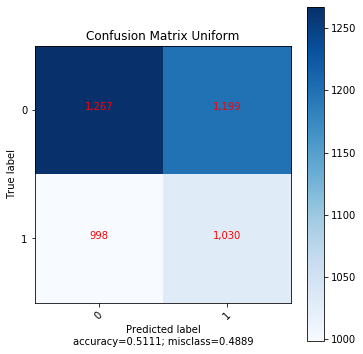

Precision: 0.511
Recall: 0.511
f1_micro: 0.511 

Precision: 0.511
Recall: 0.511
f1_macro: 0.510 



Constant 0:

confusion matrix
 [[2466    0]
 [2028    0]]


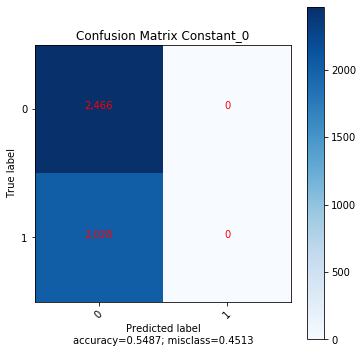

Precision: 0.549
Recall: 0.549
f1_micro: 0.549 

Precision: 0.274
Recall: 0.500
f1_macro: 0.354 



Constant 1:

confusion matrix
 [[   0 2466]
 [   0 2028]]


/home/mike/jubyter/my_project_env/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1268: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


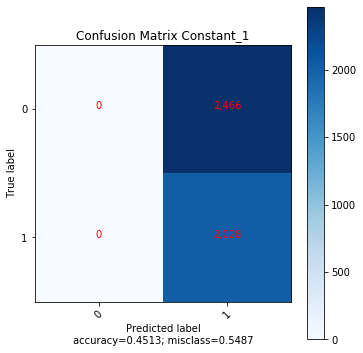

Precision: 0.451
Recall: 0.451
f1_micro: 0.451 

Precision: 0.226
Recall: 0.500
f1_macro: 0.311 



Most Frequent:

confusion matrix
 [[2466    0]
 [2028    0]]


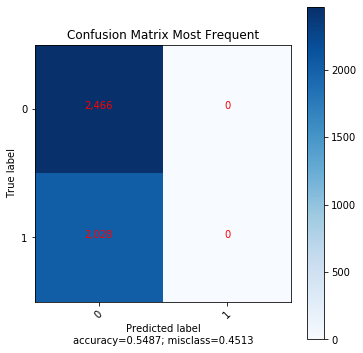

Precision: 0.549
Recall: 0.549
f1_micro: 0.549 

Precision: 0.274
Recall: 0.500
f1_macro: 0.354 



Stratified:

confusion matrix
 [[1351 1115]
 [1116  912]]


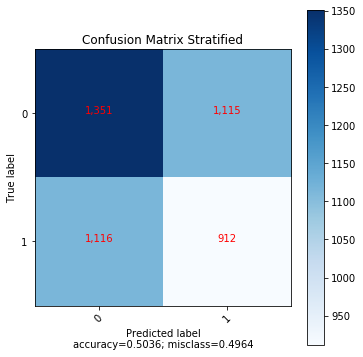

Precision: 0.504
Recall: 0.504
f1_micro: 0.504 

Precision: 0.499
Recall: 0.499
f1_macro: 0.499 



In [0]:
# Dummy classifiers

from sklearn.dummy import DummyClassifier
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import confusion_matrix



f1_micro_total = []
f1_macro_total = []


# uniform
print("Uniform:\n")
dc_uniform = DummyClassifier(strategy="uniform")
dc_uniform.fit(train, train_labels)
pred = dc_uniform.predict(test)
cnf_matrix = confusion_matrix(test_labels, pred)
print('confusion matrix\n', cnf_matrix)
plot_confusion_matrix(cnf_matrix, [0,1], 'Uniform')

precision, recall, f1_micro, _ = precision_recall_fscore_support(test_labels, pred, average='micro')
print('Precision: %.3f\nRecall: %.3f\nf1_micro: %.3f \n' % (precision, recall, f1_micro))
precision, recall, f1_macro, _ = precision_recall_fscore_support(test_labels, pred, average='macro')
print('Precision: %.3f\nRecall: %.3f\nf1_macro: %.3f \n' % (precision, recall, f1_macro))

f1_micro_total.append(f1_micro)
f1_macro_total.append(f1_macro)



# constant 0
print("\n\nConstant 0:\n")
dc_constant_0 = DummyClassifier(strategy="constant", constant=0)
dc_constant_0.fit(train, train_labels)
pred = dc_constant_0.predict(test)
cnf_matrix = confusion_matrix(test_labels, pred)
print('confusion matrix\n', cnf_matrix)
plot_confusion_matrix(cnf_matrix, [0,1], 'Constant_0')

precision, recall, f1_micro, _ = precision_recall_fscore_support(test_labels, pred, average='micro')
print('Precision: %.3f\nRecall: %.3f\nf1_micro: %.3f \n' % (precision, recall, f1_micro))
precision, recall, f1_macro, _ = precision_recall_fscore_support(test_labels, pred, average='macro')
print('Precision: %.3f\nRecall: %.3f\nf1_macro: %.3f \n' % (precision, recall, f1_macro))

f1_micro_total.append(f1_micro)
f1_macro_total.append(f1_macro)



# constant 1
print("\n\nConstant 1:\n")
dc_constant_1 = DummyClassifier(strategy="constant", constant=1)
dc_constant_1.fit(train, train_labels)
pred = dc_constant_1.predict(test)
cnf_matrix = confusion_matrix(test_labels, pred)
print('confusion matrix\n', cnf_matrix)
plot_confusion_matrix(cnf_matrix, [0,1], 'Constant_1')

precision, recall, f1_micro, _ = precision_recall_fscore_support(test_labels, pred, average='micro')
print('Precision: %.3f\nRecall: %.3f\nf1_micro: %.3f \n' % (precision, recall, f1_micro))
precision, recall, f1_macro, _ = precision_recall_fscore_support(test_labels, pred, average='macro')
print('Precision: %.3f\nRecall: %.3f\nf1_macro: %.3f \n' % (precision, recall, f1_macro))

f1_micro_total.append(f1_micro)
f1_macro_total.append(f1_macro)



# most_frequent
print("\n\nMost Frequent:\n")
dc_most_frequent = DummyClassifier(strategy="most_frequent")
dc_most_frequent.fit(train, train_labels)
pred = dc_most_frequent.predict(test)
cnf_matrix = confusion_matrix(test_labels, pred)
print('confusion matrix\n', cnf_matrix)
plot_confusion_matrix(cnf_matrix, [0,1], 'Most Frequent')

precision, recall, f1_micro, _ = precision_recall_fscore_support(test_labels, pred, average='micro')
print('Precision: %.3f\nRecall: %.3f\nf1_micro: %.3f \n' % (precision, recall, f1_micro))
precision, recall, f1_macro, _ = precision_recall_fscore_support(test_labels, pred, average='macro')
print('Precision: %.3f\nRecall: %.3f\nf1_macro: %.3f \n' % (precision, recall, f1_macro))

f1_micro_total.append(f1_micro)
f1_macro_total.append(f1_macro)



#stratified
print("\n\nStratified:\n")
dc_stratified = DummyClassifier(strategy="stratified")
dc_stratified.fit(train, train_labels)
pred = dc_stratified.predict(test)
cnf_matrix = confusion_matrix(test_labels, pred)
print('confusion matrix\n', cnf_matrix)
plot_confusion_matrix(cnf_matrix, [0,1], 'Stratified')

precision, recall, f1_micro, _ = precision_recall_fscore_support(test_labels, pred, average='micro')
print('Precision: %.3f\nRecall: %.3f\nf1_micro: %.3f \n' % (precision, recall, f1_micro))
precision, recall, f1_macro, _ = precision_recall_fscore_support(test_labels, pred, average='macro')
print('Precision: %.3f\nRecall: %.3f\nf1_macro: %.3f \n' % (precision, recall, f1_macro))

f1_micro_total.append(f1_micro)
f1_macro_total.append(f1_macro)



confusion matrix
 [[  55 2411]
 [  41 1987]]


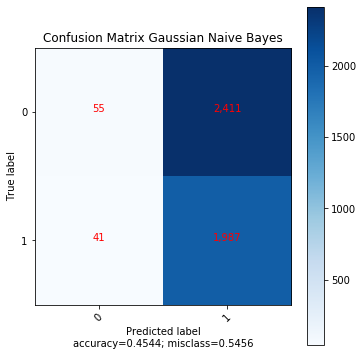

Precision: 0.454
Recall: 0.454
f1_micro: 0.454 

Precision: 0.512
Recall: 0.501
f1_macro: 0.331 



In [0]:
# Gaussian Naive Bayes

from sklearn.naive_bayes import GaussianNB


gnb = GaussianNB()
gnb.fit(train, train_labels)
pred_gnb = gnb.predict(test)
cnf_matrix = confusion_matrix(test_labels, pred_gnb)
print('confusion matrix\n', cnf_matrix)
plot_confusion_matrix(cnf_matrix, [0,1], 'Gaussian Naive Bayes')

precision, recall, f1_micro_gnb, _ = precision_recall_fscore_support(test_labels, pred_gnb, average='micro')
print('Precision: %.3f\nRecall: %.3f\nf1_micro: %.3f \n' % (precision, recall, f1_micro_gnb))
precision, recall, f1_macro_gnb, _ = precision_recall_fscore_support(test_labels, pred_gnb, average='macro')
print('Precision: %.3f\nRecall: %.3f\nf1_macro: %.3f \n' % (precision, recall, f1_macro_gnb))

f1_micro_total.append(f1_micro_gnb)
f1_macro_total.append(f1_macro_gnb)

confusion matrix
 [[2391   75]
 [  82 1946]]


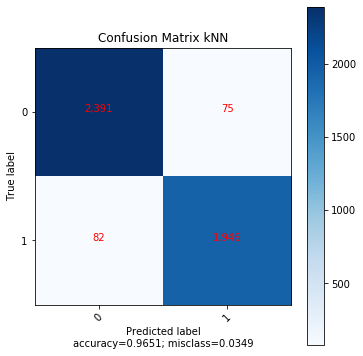

Precision: 0.965
Recall: 0.965
f1_micro: 0.965 

Precision: 0.965
Recall: 0.965
f1_macro: 0.965 



In [0]:
# kNN

from sklearn.neighbors import KNeighborsClassifier


knn = KNeighborsClassifier()
knn.fit(train, train_labels)
pred_knn = knn.predict(test)
cnf_matrix_knn = confusion_matrix(test_labels, pred_knn)
print('confusion matrix\n', cnf_matrix_knn)
plot_confusion_matrix(cnf_matrix_knn, [0,1], 'kNN')

precision, recall, f1_micro_knn, _ = precision_recall_fscore_support(test_labels, pred_knn, average='micro')
print('Precision: %.3f\nRecall: %.3f\nf1_micro: %.3f \n' % (precision, recall, f1_micro_knn))
precision, recall, f1_macro_knn, _ = precision_recall_fscore_support(test_labels, pred_knn, average='macro')
print('Precision: %.3f\nRecall: %.3f\nf1_macro: %.3f \n' % (precision, recall, f1_macro_knn))

f1_micro_total.append(f1_micro_knn)
f1_macro_total.append(f1_macro_knn)

confusion matrix
 [[   0 2466]
 [   0 2028]]


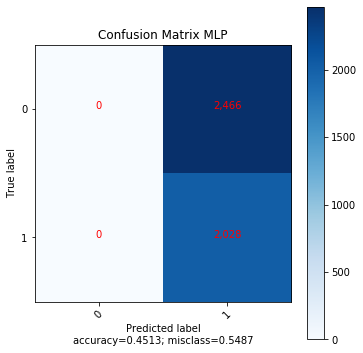

Precision: 0.451
Recall: 0.451
f1_micro: 0.451 

Precision: 0.226
Recall: 0.500
f1_macro: 0.311 



/home/mike/jubyter/my_project_env/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1268: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [0]:
# MLP

from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report

mlp = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(5,), random_state=1)
mlp.fit(train, train_labels)
pred_mlp = mlp.predict(test)
cnf_matrix_mlp = confusion_matrix(test_labels, pred_mlp)
print('confusion matrix\n', cnf_matrix_mlp)
plot_confusion_matrix(cnf_matrix_mlp, [0,1], 'MLP')

precision, recall, f1_micro_mlp, _ = precision_recall_fscore_support(test_labels, pred_mlp, average='micro')
print('Precision: %.3f\nRecall: %.3f\nf1_micro: %.3f \n' % (precision, recall, f1_micro_mlp))
precision, recall, f1_macro_mlp, _ = precision_recall_fscore_support(test_labels, pred_mlp, average='macro')
print('Precision: %.3f\nRecall: %.3f\nf1_macro: %.3f \n' % (precision, recall, f1_macro_mlp))

f1_micro_total.append(f1_micro_mlp)
f1_macro_total.append(f1_macro_mlp)

Παρατηρούμε ότι χωρίς προσεκτική μελέτη των παραμέτρων, ο MLP κατατάσει όλα τα test δεδομένα σε μία κλάση.

#(2)
Εκτυπώνουμε bar plot που περιέχει τις f1 τιμές (micro και macro) για όλους τους classifiers.


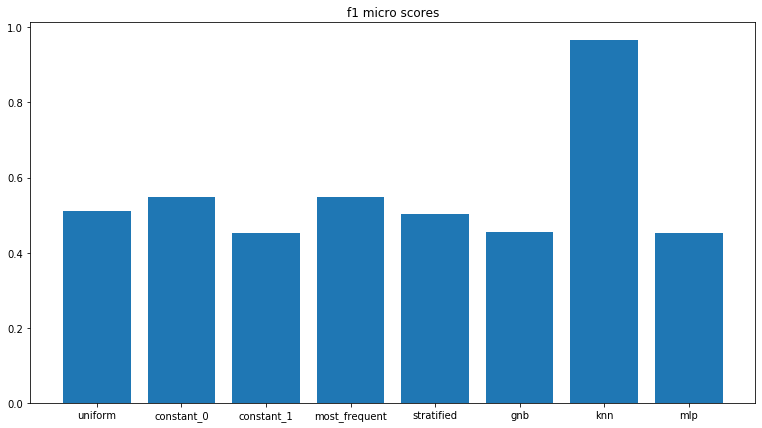

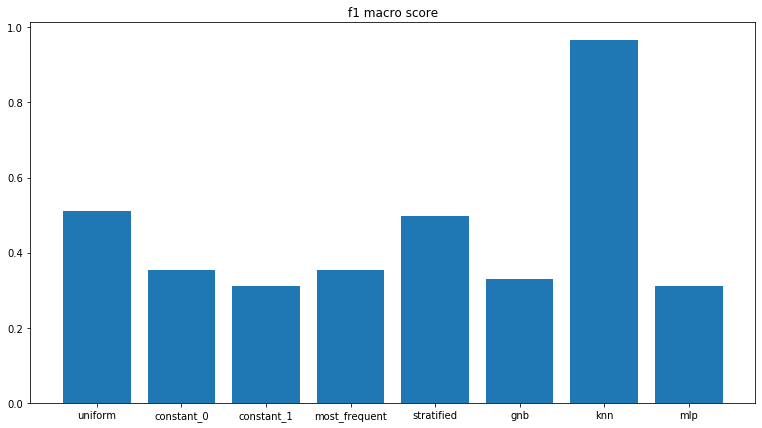

In [0]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(13,7))
classifiers = ['uniform', 'constant_0', 'constant_1', 'most_frequent', 'stratified', 'gnb', 'knn', 'mlp']
ax.bar(classifiers, f1_micro_total, width=0.8)
ax.set_title('f1 micro scores')

fig, ax = plt.subplots(figsize=(13,7))
ax.bar(classifiers, f1_macro_total, width=0.8)
ax.set_title('f1 macro score')

plt.show()

#(3)
Με βάση τα παραπάνω βγάζουμε τα εξής συμπεράσματα:

- ο knn μοίαζει να είναι ο βέλτιστος ταξινομητής για το συγκεκριμένο πρόβλημα, αφού χωρίς βελτιστοποίηση πετυχαίνει ήδη κορυφαία αποτελέσματα.
- οι dummy classifiers πετυχαίνουν όπως συνήθως, πολύ μέτρια αποτελέσματα
- ο mlp κάνει προβλέψης όμοιες με τον constant_1 και συνεπώς το score που πετυχαίνει είναι σχετικά χαμηλό. Περιμένουμε ωστόσο μεγάλη βελτίωση μετά την βελτιστοποίηση των παραμέτρων
- ο gnb επίσης δεν πετυχαίνει καλά αποτελέσματα

## Δ. Βελτιστοποίηση ταξινομητών


#(1)

Εισάγουμε τις απαραίτητες βιβλιοθήκες:


In [0]:
#from imblearn.pipeline import Pipeline
from imblearn.pipeline import Pipeline

# φέρνουμε τις γνωστές μας κλάσεις για preprocessing
from sklearn.feature_selection import VarianceThreshold
from sklearn.preprocessing import StandardScaler # φέρνουμε τον StandarScaler ως transformer που έχει .transform kai ΄όχι ως scale()
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV
from sklearn import preprocessing

import time

Ένα κομμάτι για την βελτιστοποίηση αφορά τη **προεπεξεργασία των δεδομένων**. Ελέγχουμε εάν υπάρχουν χαρακτηριστικά με μηδενικό variance, δηλαδή χαρακτηριστικά που δεν περιέχουν καμία χρήσιμη πληροφορία και δεν βοηθούν τον ταξινομητή στον διαχωρισμό. Στην συγκεκριμένη περίπτωση δεν υπάρχουν τέτοια.

Επίσης ελέχουμε γενικά τις τιμές των variance και αποθηκεύουμε το μεγαλύτερο. Στην συνέχεια, βασιζόμενοι στην τιμή του θα θέτουμε το κατώφλι του variance για την επιλογή ενός υποσυνόλου των features και θα ελέγχουμε εάν οδηγεί σε καλύτερα αποτελέσμτα.

In [0]:
Xvar = np.var(train, axis=0)
print('Variance:\n', Xvar)

selector = VarianceThreshold()
train_reduced = selector.fit_transform(train)
mask = selector.get_support()
test_reduced = test[:,mask]
print('Mask:\n', mask)

train_variance = train.var(axis=0)
max_train_variance = np.max(train_variance)
min_train_variance = np.min(train_variance)
print('Max Variance: ', max_train_variance)
print('Min Variance: ', min_train_variance)

Variance:
 [8.87057833e+06 2.62833328e+03 2.63462127e+03 3.88687867e+07
 1.60438435e+03 1.22192467e+07 3.02376854e+07 1.08480322e+03
 6.51958867e+06 1.90544316e+03 1.78858439e+03 2.29824031e+03
 2.08528360e+06 4.95759604e+07]
Mask:
 [ True  True  True  True  True  True  True  True  True  True  True  True
  True  True]
Max Variance:  49575960.35695625
Min Variance:  1084.803221080899


Παρατηρούμε ότι δεν χρειάζεται να αφαιρέσουμε κανένα feature από το dataset μας. Συνεχίζουμε με την προεπεξεργασία των δεδομένων και τον καθορισμό των υπερπαραμέτρων για κάθε ταξινομητή ξεχωριστά.

### GNB

Ο Gaussian Naive Bayes είναι σχετικά απλός αλγόριθμος, αφού δεν δέχεται υπερπαραμέτρους. Συνεπώς, οι βελτιστοποιήσεις μας θα αφορούν το preprocessing το δεδομένων.
Θα χρειαστεί να εξετάσουμε διάφορες τιμές για threshold και pca. Επίσης θα εξετάσουμε εάν η χρήση scaler βελτιώνει ή χειροτερεύει τα αποτελέσματα. 
Τέλος, θα δοκιμάσουμε την χρήση sampler, παρόλο που το dataset μας είναι ήδη αρκετά ισορροπημένο. (45:55)

Τρέχουμε (με scaler για αρχή) θέτοντας κάποιες τιμές για το threshold ως ποσοστό του μέγιστου threshold:

In [0]:
# hyperparameters for gridsearch
vthreshold = [i * max_train_variance for i in [0, 0.05, 0.1, 0.15, 0.2]] #προσαρμόζουμε τις τιμές μας στο max(variance) που παρατηρήσαμε
n_components = [2, 4, 6, 8, 10, 12, 14]

# αρχικοποιούμε τους εκτιμητές (μετασχηματιστές και ταξινομητή) χωρείς παραμέτρους
selector = VarianceThreshold()
scaler = StandardScaler()
pca = PCA()
clf = GaussianNB() # η παράμετρος n_jobs = 1 χρησιμοποιεί όλους τους πυρήνες του υπολογιστή
pipe = Pipeline(steps=[('selector', selector), ('scaler', scaler), ('pca', pca), ('gnb', clf)], memory = 'tmp')

estimator = GridSearchCV(pipe, dict(selector__threshold=vthreshold, pca__n_components=n_components), cv=5, scoring='f1_macro', n_jobs=-1)

start_time = time.time()
estimator.fit(train, train_labels)
preds = estimator.predict(test)
print("Συνολικός χρόνος fit και predict: %s seconds" % (time.time() - start_time))

precision, recall, f1_micro, _ = precision_recall_fscore_support(test_labels, preds, average='micro')
print('Precision: %.3f\nRecall: %.3f\nf1_micro: %.3f \n' % (precision, recall, f1_micro))
precision, recall, f1_macro, _ = precision_recall_fscore_support(test_labels, preds, average='macro')
print('Precision: %.3f\nRecall: %.3f\nf1_macro: %.3f \n' % (precision, recall, f1_macro))

print(estimator.best_estimator_)
print(estimator.best_params_)

Συνολικός χρόνος fit και predict: 3.353271722793579 seconds
Precision: 0.479
Recall: 0.479
f1_micro: 0.479 

Precision: 0.621
Recall: 0.523
f1_macro: 0.378 

Pipeline(memory='tmp',
         steps=[('selector', VarianceThreshold(threshold=0.0)),
                ('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('pca',
                 PCA(copy=True, iterated_power='auto', n_components=14,
                     random_state=None, svd_solver='auto', tol=0.0,
                     whiten=False)),
                ('gnb', GaussianNB(priors=None, var_smoothing=1e-09))],
         verbose=False)
{'pca__n_components': 14, 'selector__threshold': 0.0}


Και χωρίς scaler:

In [0]:
# hyperparameters for gridsearch
vthreshold = [i * max_train_variance for i in [0, 0.05, 0.1, 0.15, 0.2]] #προσαρμόζουμε τις τιμές μας στο max(variance) που παρατηρήσαμε
n_components = [2, 4, 6, 8, 10, 12, 14]

# αρχικοποιούμε τους εκτιμητές (μετασχηματιστές και ταξινομητή) χωρείς παραμέτρους
selector = VarianceThreshold()
pca = PCA()
clf = GaussianNB() # η παράμετρος n_jobs = 1 χρησιμοποιεί όλους τους πυρήνες του υπολογιστή
pipe = Pipeline(steps=[('selector', selector), ('pca', pca), ('gnb', clf)], memory = 'tmp')

estimator = GridSearchCV(pipe, dict(selector__threshold=vthreshold, pca__n_components=n_components), cv=5, scoring='f1_macro', n_jobs=-1)

start_time = time.time()
estimator.fit(train, train_labels)
preds = estimator.predict(test)
print("Συνολικός χρόνος fit και predict: %s seconds" % (time.time() - start_time))

precision, recall, f1_micro, _ = precision_recall_fscore_support(test_labels, preds, average='micro')
print('Precision: %.3f\nRecall: %.3f\nf1_micro: %.3f \n' % (precision, recall, f1_micro))
precision, recall, f1_macro, _ = precision_recall_fscore_support(test_labels, preds, average='macro')
print('Precision: %.3f\nRecall: %.3f\nf1_macro: %.3f \n' % (precision, recall, f1_macro))

print(estimator.best_estimator_)
print(estimator.best_params_)

Συνολικός χρόνος fit και predict: 0.5417826175689697 seconds
Precision: 0.461
Recall: 0.461
f1_micro: 0.461 

Precision: 0.586
Recall: 0.507
f1_macro: 0.339 

Pipeline(memory='tmp',
         steps=[('selector', VarianceThreshold(threshold=0.0)),
                ('pca',
                 PCA(copy=True, iterated_power='auto', n_components=14,
                     random_state=None, svd_solver='auto', tol=0.0,
                     whiten=False)),
                ('gnb', GaussianNB(priors=None, var_smoothing=1e-09))],
         verbose=False)
{'pca__n_components': 14, 'selector__threshold': 0.0}


Παρατηρούμε ότι με χρήση scaler υπάρχει βελτίωση. Εξετάζουμε κατα πόσο η χρήση του sampler βοηθάει στην βελτίωση των αποτελεσμάτων:

In [0]:
# hyperparameters for gridsearch
vthreshold = [i * max_train_variance for i in [0, 0.05, 0.1, 0.15, 0.2]] #προσαρμόζουμε τις τιμές μας στο max(variance) που παρατηρήσαμε
n_components = [2, 4, 6, 8, 10, 12, 14]

# αρχικοποιούμε τους εκτιμητές (μετασχηματιστές και ταξινομητή) χωρείς παραμέτρους
selector = VarianceThreshold()
scaler = StandardScaler()
ros = RandomOverSampler()
pca = PCA()
clf = GaussianNB() # η παράμετρος n_jobs = 1 χρησιμοποιεί όλους τους πυρήνες του υπολογιστή
pipe = Pipeline(steps=[('selector', selector), ('scaler', scaler), ('sampler', ros), ('pca', pca), ('gnb', clf)], memory = 'tmp')

estimator = GridSearchCV(pipe, dict(selector__threshold=vthreshold, pca__n_components=n_components), cv=5, scoring='f1_macro', n_jobs=-1)

start_time = time.time()
estimator.fit(train, train_labels)
preds = estimator.predict(test)
print("Συνολικός χρόνος fit και predict: %s seconds" % (time.time() - start_time))

precision, recall, f1_micro, _ = precision_recall_fscore_support(test_labels, preds, average='micro')
print('Precision: %.3f\nRecall: %.3f\nf1_micro: %.3f \n' % (precision, recall, f1_micro))
precision, recall, f1_macro, _ = precision_recall_fscore_support(test_labels, preds, average='macro')
print('Precision: %.3f\nRecall: %.3f\nf1_macro: %.3f \n' % (precision, recall, f1_macro))

print(estimator.best_estimator_)
print(estimator.best_params_)

Συνολικός χρόνος fit και predict: 0.5202958583831787 seconds
Precision: 0.473
Recall: 0.473
f1_micro: 0.473 

Precision: 0.611
Recall: 0.518
f1_macro: 0.367 

Pipeline(memory='tmp',
         steps=[('selector', VarianceThreshold(threshold=0.0)),
                ('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('sampler',
                 RandomOverSampler(random_state=None,
                                   sampling_strategy='auto')),
                ('pca',
                 PCA(copy=True, iterated_power='auto', n_components=14,
                     random_state=None, svd_solver='auto', tol=0.0,
                     whiten=False)),
                ('gnb', GaussianNB(priors=None, var_smoothing=1e-09))],
         verbose=False)
{'pca__n_components': 14, 'selector__threshold': 0.0}


Από τις παραπάνω προσπάθειες παρατηρούμε ότι για βέλτιστα αποτελέσματα δεν χρειαζόμαστε sampler και η τιμή threshold πρέπει να είναι ίση με 0, άρα δεν χρειαζόμαστε  selector. Επίσης, η προσθήκη scaler βελτιώνει τα αποτελέσματα. Τέλος, το dimensionality reduction οδηγεί σε χειρότερα αποτελέσματα, για αυτό το λόγο και το pca πετυχαίνει βέλτιστα αποτελέσματα μόνο όταν διατηρεί και τα 14 features. Εδώ αξίζει να σημειώσουμε πως ο **pca**, παρότι έχει βέλτιστη τιμή 14, δηλαδή **δεν μεινώνει την διαστατικότητα**, είναι **απαραίτητος** στη επίτευξη βέλτιστων αποτελεσμάτων:

In [0]:
# hyperparameters for gridsearch
vthreshold = [i * max_train_variance for i in [0, 0.001, 0.002, 0.004, 0.008, 0.01, 0.02, 0.03, 0.04, 0.05]] #προσαρμόζουμε τις τιμές μας στο max(variance) που παρατηρήσαμε
n_components = [11, 12, 13, 14]

# αρχικοποιούμε τους εκτιμητές (μετασχηματιστές και ταξινομητή) χωρείς παραμέτρους
selector = VarianceThreshold()
scaler = StandardScaler()
pca = PCA()
clf = GaussianNB() # η παράμετρος n_jobs = 1 χρησιμοποιεί όλους τους πυρήνες του υπολογιστή
pipe = Pipeline(steps=[('selector', selector), ('scaler', scaler), ('pca', pca), ('gnb', clf)], memory = 'tmp')

estimator = GridSearchCV(pipe, dict(selector__threshold=vthreshold, pca__n_components=n_components), cv=5, scoring='f1_macro', n_jobs=-1)

start_time = time.time()
estimator.fit(train, train_labels)
preds = estimator.predict(test)
print("Συνολικός χρόνος fit και predict: %s seconds" % (time.time() - start_time))

precision, recall, f1_micro, _ = precision_recall_fscore_support(test_labels, preds, average='micro')
print('Precision: %.3f\nRecall: %.3f\nf1_micro: %.3f \n' % (precision, recall, f1_micro))
precision, recall, f1_macro, _ = precision_recall_fscore_support(test_labels, preds, average='macro')
print('Precision: %.3f\nRecall: %.3f\nf1_macro: %.3f \n' % (precision, recall, f1_macro))

print(estimator.best_estimator_)
print(estimator.best_params_)

Συνολικός χρόνος fit και predict: 0.4929807186126709 seconds
Precision: 0.479
Recall: 0.479
f1_micro: 0.479 

Precision: 0.621
Recall: 0.523
f1_macro: 0.378 

Pipeline(memory='tmp',
         steps=[('selector', VarianceThreshold(threshold=0.0)),
                ('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('pca',
                 PCA(copy=True, iterated_power='auto', n_components=14,
                     random_state=None, svd_solver='auto', tol=0.0,
                     whiten=False)),
                ('gnb', GaussianNB(priors=None, var_smoothing=1e-09))],
         verbose=False)
{'pca__n_components': 14, 'selector__threshold': 0.0}


In [0]:
# hyperparameters for gridsearch
vthreshold = [i * max_train_variance for i in [0, 0.001, 0.002, 0.004, 0.008, 0.01, 0.02, 0.03, 0.04, 0.05]] #προσαρμόζουμε τις τιμές μας στο max(variance) που παρατηρήσαμε

# αρχικοποιούμε τους εκτιμητές (μετασχηματιστές και ταξινομητή) χωρείς παραμέτρους
selector = VarianceThreshold()
scaler = StandardScaler()
clf = GaussianNB() # η παράμετρος n_jobs = 1 χρησιμοποιεί όλους τους πυρήνες του υπολογιστή
pipe = Pipeline(steps=[('selector', selector), ('scaler', scaler), ('gnb', clf)], memory = 'tmp')

estimator = GridSearchCV(pipe, dict(selector__threshold=vthreshold), cv=5, scoring='f1_macro', n_jobs=-1)

start_time = time.time()
estimator.fit(train, train_labels)
preds = estimator.predict(test)
print("Συνολικός χρόνος fit και predict: %s seconds" % (time.time() - start_time))

precision, recall, f1_micro, _ = precision_recall_fscore_support(test_labels, preds, average='micro')
print('Precision: %.3f\nRecall: %.3f\nf1_micro: %.3f \n' % (precision, recall, f1_micro))
precision, recall, f1_macro, _ = precision_recall_fscore_support(test_labels, preds, average='macro')
print('Precision: %.3f\nRecall: %.3f\nf1_macro: %.3f \n' % (precision, recall, f1_macro))

print(estimator.best_estimator_)
print(estimator.best_params_)

Συνολικός χρόνος fit και predict: 0.2834453582763672 seconds
Precision: 0.454
Recall: 0.454
f1_micro: 0.454 

Precision: 0.512
Recall: 0.501
f1_macro: 0.331 

Pipeline(memory='tmp',
         steps=[('selector', VarianceThreshold(threshold=0.0)),
                ('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('gnb', GaussianNB(priors=None, var_smoothing=1e-09))],
         verbose=False)
{'selector__threshold': 0.0}


### KNN

Οι βελτιστοποιήσεις μας για το kNN αλγόριθμο αφορούν τόσο το preprocessing των δεδομένων όσο και την ρύθμιση των υπερπαραμέτρων.
Θα χρειαστεί να εξετάσουμε διάφορες τιμές για threshold και pca. Επίσης θα εξετάσουμε εάν η χρήση scaler βελτιώνει ή χειροτερεύει τα αποτελέσματα. 
Θα δοκιμάσουμε την χρήση sampler, παρόλο που το dataset μας είναι ήδη αρκετά ισορροπημένο. 
Τέλος θα δοκιμάσουμε διαφορετικές τιμε΄ς για 3 υπερπαραμέτρους του αλγορίθμου.

Τρέχουμε (με scaler για αρχή) θέτοντας κάποιες τιμές για το threshold ως ποσοστό του μέγιστου threshold:

In [0]:
# hyperparameters for gridsearch
vthreshold = [i * max_train_variance for i in [0, 0.1, 0.2]] #προσαρμόζουμε τις τιμές μας στο max(variance) που παρατηρήσαμε
n_components = [10, 12, 14]
k = [1, 5, 7, 11, 21, 31] # η υπερπαράμετρος του ταξινομητή

# αρχικοποιούμε τους εκτιμητές (μετασχηματιστές και ταξινομητή) χωρείς παραμέτρους
selector = VarianceThreshold()
scaler = StandardScaler()
ros = RandomOverSampler()
pca = PCA()
clf = KNeighborsClassifier(n_jobs=-1) # η παράμετρος n_jobs = 1 χρησιμοποιεί όλους τους πυρήνες του υπολογιστή
pipe = Pipeline(steps=[('selector', selector), ('scaler', scaler), ('sampler', ros), ('pca', pca), ('kNN', clf)], memory = 'tmp')

estimator = GridSearchCV(pipe, dict(selector__threshold=vthreshold, pca__n_components=n_components, kNN__n_neighbors=k), cv=5, scoring='f1_micro', n_jobs=-1)

start_time = time.time()
estimator.fit(train, train_labels)
preds = estimator.predict(test)
print("Συνολικός χρόνος fit και predict: %s seconds" % (time.time() - start_time))
precision, recall, f1_micro, _ = precision_recall_fscore_support(test_labels, preds, average='micro')
print('Precision: %.3f\nRecall: %.3f\nf1_micro: %.3f \n' % (precision, recall, f1_micro))
precision, recall, f1_macro, _ = precision_recall_fscore_support(test_labels, preds, average='macro')
print('Precision: %.3f\nRecall: %.3f\nf1_macro: %.3f \n' % (precision, recall, f1_macro))

print(estimator.best_estimator_)
print(estimator.best_params_)

estimator = GridSearchCV(pipe, dict(selector__threshold=vthreshold, pca__n_components=n_components, kNN__n_neighbors=k), cv=5, scoring='f1_macro', n_jobs=-1)

start_time = time.time()
estimator.fit(train, train_labels)
preds = estimator.predict(test)
print("Συνολικός χρόνος fit και predict: %s seconds" % (time.time() - start_time))
precision, recall, f1_micro, _ = precision_recall_fscore_support(test_labels, preds, average='micro')
print('Precision: %.3f\nRecall: %.3f\nf1_micro: %.3f \n' % (precision, recall, f1_micro))
precision, recall, f1_macro, _ = precision_recall_fscore_support(test_labels, preds, average='macro')
print('Precision: %.3f\nRecall: %.3f\nf1_macro: %.3f \n' % (precision, recall, f1_macro))

print(estimator.best_estimator_)
print(estimator.best_params_)

Συνολικός χρόνος fit και predict: 4.254716396331787 seconds
Precision: 0.823
Recall: 0.823
f1_micro: 0.823 

Precision: 0.822
Recall: 0.820
f1_macro: 0.821 

Pipeline(memory='tmp',
         steps=[('selector', VarianceThreshold(threshold=0.0)),
                ('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('sampler',
                 RandomOverSampler(random_state=None,
                                   sampling_strategy='auto')),
                ('pca',
                 PCA(copy=True, iterated_power='auto', n_components=12,
                     random_state=None, svd_solver='auto', tol=0.0,
                     whiten=False)),
                ('kNN',
                 KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                      metric='minkowski', metric_params=None,
                                      n_jobs=-1, n_neighbors=1, p=2,
                                      weights='uniform'))],
     

Τα αποτελέσματα είναι αρκετά χειρότερα από την απλή εκδοχή του αλγορίθμου που υλοποιήσαμε στο Γ. Αυτό σημαίνει ότι κάποιο από τα στάδια της προεπεξεργασίας των δεδομένων χειροτερεύει αντί να καλύτερεύει την επίδοση του αλγορίθμου. 

Επαναλαμβάνουμε αφαιρώντας τον sampler:

In [0]:
# hyperparameters for gridsearch
vthreshold = [i * max_train_variance for i in [0, 0.1, 0.2]] #προσαρμόζουμε τις τιμές μας στο max(variance) που παρατηρήσαμε
n_components = [10, 12, 14]
k = [1, 5, 7, 11, 21, 31] # η υπερπαράμετρος του ταξινομητή

# αρχικοποιούμε τους εκτιμητές (μετασχηματιστές και ταξινομητή) χωρείς παραμέτρους
selector = VarianceThreshold()
scaler = StandardScaler()
pca = PCA()
clf = KNeighborsClassifier(n_jobs=-1) # η παράμετρος n_jobs = 1 χρησιμοποιεί όλους τους πυρήνες του υπολογιστή
pipe = Pipeline(steps=[('selector', selector), ('scaler', scaler), ('pca', pca), ('kNN', clf)], memory = 'tmp')

estimator = GridSearchCV(pipe, dict(selector__threshold=vthreshold, pca__n_components=n_components, kNN__n_neighbors=k), cv=5, scoring='f1_micro', n_jobs=-1)

start_time = time.time()
estimator.fit(train, train_labels)
preds = estimator.predict(test)
print("Συνολικός χρόνος fit και predict: %s seconds" % (time.time() - start_time))
precision, recall, f1_micro, _ = precision_recall_fscore_support(test_labels, preds, average='micro')
print('Precision: %.3f\nRecall: %.3f\nf1_micro: %.3f \n' % (precision, recall, f1_micro))
precision, recall, f1_macro, _ = precision_recall_fscore_support(test_labels, preds, average='macro')
print('Precision: %.3f\nRecall: %.3f\nf1_macro: %.3f \n' % (precision, recall, f1_macro))

print(estimator.best_estimator_)
print(estimator.best_params_)

Συνολικός χρόνος fit και predict: 4.217304944992065 seconds
Precision: 0.823
Recall: 0.823
f1_micro: 0.823 

Precision: 0.822
Recall: 0.820
f1_macro: 0.821 

Pipeline(memory='tmp',
         steps=[('selector', VarianceThreshold(threshold=0.0)),
                ('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('pca',
                 PCA(copy=True, iterated_power='auto', n_components=12,
                     random_state=None, svd_solver='auto', tol=0.0,
                     whiten=False)),
                ('kNN',
                 KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                      metric='minkowski', metric_params=None,
                                      n_jobs=-1, n_neighbors=1, p=2,
                                      weights='uniform'))],
         verbose=False)
{'kNN__n_neighbors': 1, 'pca__n_components': 12, 'selector__threshold': 0.0}


Συνεχίζουμε αφαιρώντας τον scaler:

In [0]:
# hyperparameters for gridsearch
vthreshold = [i * max_train_variance for i in [0, 0.1, 0.2]] #προσαρμόζουμε τις τιμές μας στο max(variance) που παρατηρήσαμε
n_components = [10, 12, 14]
k = [1, 5, 7, 11, 21, 31] # η υπερπαράμετρος του ταξινομητή

# αρχικοποιούμε τους εκτιμητές (μετασχηματιστές και ταξινομητή) χωρείς παραμέτρους
selector = VarianceThreshold()
pca = PCA()
clf = KNeighborsClassifier(n_jobs=-1) # η παράμετρος n_jobs = 1 χρησιμοποιεί όλους τους πυρήνες του υπολογιστή
pipe = Pipeline(steps=[('selector', selector), ('pca', pca), ('kNN', clf)], memory = 'tmp')

estimator = GridSearchCV(pipe, dict(selector__threshold=vthreshold, pca__n_components=n_components, kNN__n_neighbors=k), cv=5, scoring='f1_micro', n_jobs=-1)

start_time = time.time()
estimator.fit(train, train_labels)
preds = estimator.predict(test)
print("Συνολικός χρόνος fit και predict: %s seconds" % (time.time() - start_time))
precision, recall, f1_micro, _ = precision_recall_fscore_support(test_labels, preds, average='micro')
print('Precision: %.3f\nRecall: %.3f\nf1_micro: %.3f \n' % (precision, recall, f1_micro))
precision, recall, f1_macro, _ = precision_recall_fscore_support(test_labels, preds, average='macro')
print('Precision: %.3f\nRecall: %.3f\nf1_macro: %.3f \n' % (precision, recall, f1_macro))

print(estimator.best_estimator_)
print(estimator.best_params_)

estimator = GridSearchCV(pipe, dict(selector__threshold=vthreshold, pca__n_components=n_components, kNN__n_neighbors=k), cv=5, scoring='f1_macro', n_jobs=-1)

start_time = time.time()
estimator.fit(train, train_labels)
preds = estimator.predict(test)
print("Συνολικός χρόνος fit και predict: %s seconds" % (time.time() - start_time))
precision, recall, f1_micro, _ = precision_recall_fscore_support(test_labels, preds, average='micro')
print('Precision: %.3f\nRecall: %.3f\nf1_micro: %.3f \n' % (precision, recall, f1_micro))
precision, recall, f1_macro, _ = precision_recall_fscore_support(test_labels, preds, average='macro')
print('Precision: %.3f\nRecall: %.3f\nf1_macro: %.3f \n' % (precision, recall, f1_macro))

print(estimator.best_estimator_)
print(estimator.best_params_)


Συνολικός χρόνος fit και predict: 4.717578411102295 seconds
Precision: 0.976
Recall: 0.976
f1_micro: 0.976 

Precision: 0.976
Recall: 0.976
f1_macro: 0.976 

Pipeline(memory='tmp',
         steps=[('selector', VarianceThreshold(threshold=0.0)),
                ('pca',
                 PCA(copy=True, iterated_power='auto', n_components=14,
                     random_state=None, svd_solver='auto', tol=0.0,
                     whiten=False)),
                ('kNN',
                 KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                      metric='minkowski', metric_params=None,
                                      n_jobs=-1, n_neighbors=1, p=2,
                                      weights='uniform'))],
         verbose=False)
{'kNN__n_neighbors': 1, 'pca__n_components': 14, 'selector__threshold': 0.0}
Συνολικός χρόνος fit και predict: 4.858122110366821 seconds
Precision: 0.976
Recall: 0.976
f1_micro: 0.976 

Precision: 0.976
Recall: 0.976
f1_macro: 0.

Αντικαθιστούμε με τον MinMaxScaler:

In [0]:
from sklearn.preprocessing import MinMaxScaler
# hyperparameters for gridsearch
vthreshold = [i * max_train_variance for i in [0, 0.1, 0.2]] #προσαρμόζουμε τις τιμές μας στο max(variance) που παρατηρήσαμε
n_components = [10, 12, 14]
k = [1, 5, 7, 11, 21, 31] # η υπερπαράμετρος του ταξινομητή

# αρχικοποιούμε τους εκτιμητές (μετασχηματιστές και ταξινομητή) χωρείς παραμέτρους
selector = VarianceThreshold()
scaler = MinMaxScaler()
pca = PCA()
clf = KNeighborsClassifier(n_jobs=-1) # η παράμετρος n_jobs = 1 χρησιμοποιεί όλους τους πυρήνες του υπολογιστή
pipe = Pipeline(steps=[('selector', selector), ('scaler', scaler), ('pca', pca), ('kNN', clf)], memory = 'tmp')

estimator = GridSearchCV(pipe, dict(selector__threshold=vthreshold, pca__n_components=n_components, kNN__n_neighbors=k), cv=5, scoring='f1_micro', n_jobs=-1)

start_time = time.time()
estimator.fit(train, train_labels)
preds = estimator.predict(test)
print("Συνολικός χρόνος fit και predict: %s seconds" % (time.time() - start_time))
precision, recall, f1_micro, _ = precision_recall_fscore_support(test_labels, preds, average='micro')
print('Precision: %.3f\nRecall: %.3f\nf1_micro: %.3f \n' % (precision, recall, f1_micro))
precision, recall, f1_macro, _ = precision_recall_fscore_support(test_labels, preds, average='macro')
print('Precision: %.3f\nRecall: %.3f\nf1_macro: %.3f \n' % (precision, recall, f1_macro))

print(estimator.best_estimator_)
print(estimator.best_params_)

estimator = GridSearchCV(pipe, dict(selector__threshold=vthreshold, pca__n_components=n_components, kNN__n_neighbors=k), cv=5, scoring='f1_macro', n_jobs=-1)

start_time = time.time()
estimator.fit(train, train_labels)
preds = estimator.predict(test)
print("Συνολικός χρόνος fit και predict: %s seconds" % (time.time() - start_time))
precision, recall, f1_micro, _ = precision_recall_fscore_support(test_labels, preds, average='micro')
print('Precision: %.3f\nRecall: %.3f\nf1_micro: %.3f \n' % (precision, recall, f1_micro))
precision, recall, f1_macro, _ = precision_recall_fscore_support(test_labels, preds, average='macro')
print('Precision: %.3f\nRecall: %.3f\nf1_macro: %.3f \n' % (precision, recall, f1_macro))

print(estimator.best_estimator_)
print(estimator.best_params_)

Συνολικός χρόνος fit και predict: 4.193166017532349 seconds
Precision: 0.815
Recall: 0.815
f1_micro: 0.815 

Precision: 0.814
Recall: 0.812
f1_macro: 0.813 

Pipeline(memory='tmp',
         steps=[('selector', VarianceThreshold(threshold=0.0)),
                ('scaler', MinMaxScaler(copy=True, feature_range=(0, 1))),
                ('pca',
                 PCA(copy=True, iterated_power='auto', n_components=14,
                     random_state=None, svd_solver='auto', tol=0.0,
                     whiten=False)),
                ('kNN',
                 KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                      metric='minkowski', metric_params=None,
                                      n_jobs=-1, n_neighbors=5, p=2,
                                      weights='uniform'))],
         verbose=False)
{'kNN__n_neighbors': 5, 'pca__n_components': 14, 'selector__threshold': 0.0}
Συνολικός χρόνος fit και predict: 4.203151702880859 seconds
Precision: 0.818


Από τα παραπάνω συμπεραίνουμε ότι ο scaler ρίχνει την απόδοση του ταξινομητή ενώ η χρήση του sampler είναι αδιάφορη. Είναι αναμενόμενο να παίρνουμε χειρότερα αποτελέσματα, καθώς οι διαφορές μεταξύ των αποστάσεων μικραίνουν αρκετά σε σχέση με τις αρχικές και αυτό οδηγεί σε σύμπτηξη των στοιχείων διαφορετικών κλάσεων (πιο κοντινές αποστάσεις μεταξύ τους). Ο αλγόριθμος kNN βασίζεται σε αυτές τις αποστάσεις για να παίρνει αποφάσεις και είναι λογικό τα αποτελέσμτα με και χωρίς scaler να παρουσιάζουν μεγάλες διαφορές.

Επαναλαμβάνουμε με περισσότερες τιμές κοντά στα καλύτερα αποτελέσματα που παρατηρήσαμε:

In [0]:
# hyperparameters for gridsearch
vthreshold = [i * max_train_variance for i in [0, 0.002, 0.004, 0.008, 0.016, 0.032, 0.064, 0.1, 0.2, 0.4]] #προσαρμόζουμε τις τιμές μας στο max(variance) που παρατηρήσαμε
n_components = [8, 9, 10, 11, 12, 13, 14]
k = [1, 3, 5, 7, 9, 11, 13, 17, 21, 25] # η υπερπαράμετρος του ταξινομητή

# αρχικοποιούμε τους εκτιμητές (μετασχηματιστές και ταξινομητή) χωρείς παραμέτρους
selector = VarianceThreshold()
ros = RandomOverSampler()
pca = PCA()
clf = KNeighborsClassifier(n_jobs=-1) # η παράμετρος n_jobs = 1 χρησιμοποιεί όλους τους πυρήνες του υπολογιστή
pipe = Pipeline(steps=[('selector', selector), ('sampler', ros), ('pca', pca), ('kNN', clf)], memory = 'tmp')

estimator = GridSearchCV(pipe, dict(selector__threshold=vthreshold, pca__n_components=n_components, kNN__n_neighbors=k), cv=5, scoring='f1_micro', n_jobs=-1)

start_time = time.time()
estimator.fit(train, train_labels)
preds = estimator.predict(test)
print("Συνολικός χρόνος fit και predict: %s seconds" % (time.time() - start_time))
precision, recall, f1_micro, _ = precision_recall_fscore_support(test_labels, preds, average='micro')
print('Precision: %.3f\nRecall: %.3f\nf1_micro: %.3f \n' % (precision, recall, f1_micro))
precision, recall, f1_macro, _ = precision_recall_fscore_support(test_labels, preds, average='macro')
print('Precision: %.3f\nRecall: %.3f\nf1_macro: %.3f \n' % (precision, recall, f1_macro))

print(estimator.best_estimator_)
print(estimator.best_params_)

estimator = GridSearchCV(pipe, dict(selector__threshold=vthreshold, pca__n_components=n_components, kNN__n_neighbors=k), cv=5, scoring='f1_macro', n_jobs=-1)

start_time = time.time()
estimator.fit(train, train_labels)
preds = estimator.predict(test)
print("Συνολικός χρόνος fit και predict: %s seconds" % (time.time() - start_time))
precision, recall, f1_micro, _ = precision_recall_fscore_support(test_labels, preds, average='micro')
print('Precision: %.3f\nRecall: %.3f\nf1_micro: %.3f \n' % (precision, recall, f1_micro))
precision, recall, f1_macro, _ = precision_recall_fscore_support(test_labels, preds, average='macro')
print('Precision: %.3f\nRecall: %.3f\nf1_macro: %.3f \n' % (precision, recall, f1_macro))

print(estimator.best_estimator_)
print(estimator.best_params_)

Συνολικός χρόνος fit και predict: 20.72670078277588 seconds
Precision: 0.976
Recall: 0.976
f1_micro: 0.976 

Precision: 0.976
Recall: 0.976
f1_macro: 0.976 

Pipeline(memory='tmp',
         steps=[('selector', VarianceThreshold(threshold=0.0)),
                ('sampler',
                 RandomOverSampler(random_state=None,
                                   sampling_strategy='auto')),
                ('pca',
                 PCA(copy=True, iterated_power='auto', n_components=14,
                     random_state=None, svd_solver='auto', tol=0.0,
                     whiten=False)),
                ('kNN',
                 KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                      metric='minkowski', metric_params=None,
                                      n_jobs=-1, n_neighbors=1, p=2,
                                      weights='uniform'))],
         verbose=False)
{'kNN__n_neighbors': 1, 'pca__n_components': 14, 'selector__threshold': 0.0}
Συνολικ

Προσθέτουμε και τις 2 τελευταίες υπερπαραμέτρους για την εκτέλεση του knn και εκτελούμε gridsearch (αυτή την φορά χωρίς pca, αφού πάντα διατηρούνται όλα τα χαρακτηρηστικά, με k neighbours λίγους, αφού πετυχαίνουν καλύτερα αποτελέσματα και με threshold χαμηλό):

In [0]:
# hyperparameters for gridsearch
vthreshold = [i * max_train_variance for i in [0, 0.002, 0.004, 0.008, 0.016, 0.032, 0.064, 0.1, 0.2, 0.4]] #προσαρμόζουμε τις τιμές μας στο max(variance) που παρατηρήσαμε
k = [1, 3, 5, 7, 9, 11] # η υπερπαράμετρος του ταξινομητή
metrics = ['minkowski', 'euclidean', 'manhattan']
weights = ['uniform', 'distance']

# αρχικοποιούμε τους εκτιμητές (μετασχηματιστές και ταξινομητή) χωρείς παραμέτρους
selector = VarianceThreshold()
ros = RandomOverSampler()
clf = KNeighborsClassifier(n_jobs=-1) # η παράμετρος n_jobs = 1 χρησιμοποιεί όλους τους πυρήνες του υπολογιστή
pipe = Pipeline(steps=[('selector', selector), ('sampler', ros), ('kNN', clf)], memory = 'tmp')

estimator = GridSearchCV(pipe, dict(selector__threshold=vthreshold, kNN__n_neighbors=k, kNN__metric=metrics, kNN__weights=weights), cv=5, scoring='f1_micro', n_jobs=-1)

start_time = time.time()
estimator.fit(train, train_labels)
preds = estimator.predict(test)
print("Συνολικός χρόνος fit και predict: %s seconds" % (time.time() - start_time))
precision, recall, f1_micro, _ = precision_recall_fscore_support(test_labels, preds, average='micro')
print('Precision: %.3f\nRecall: %.3f\nf1_micro: %.3f \n' % (precision, recall, f1_micro))
precision, recall, f1_macro, _ = precision_recall_fscore_support(test_labels, preds, average='macro')
print('Precision: %.3f\nRecall: %.3f\nf1_macro: %.3f \n' % (precision, recall, f1_macro))

print(estimator.best_estimator_)
print(estimator.best_params_)

Συνολικός χρόνος fit και predict: 42.798786640167236 seconds
Precision: 0.976
Recall: 0.976
f1_micro: 0.976 

Precision: 0.976
Recall: 0.976
f1_macro: 0.976 

Pipeline(memory='tmp',
         steps=[('selector', VarianceThreshold(threshold=0.0)),
                ('sampler',
                 RandomOverSampler(random_state=None,
                                   sampling_strategy='auto')),
                ('kNN',
                 KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                      metric='minkowski', metric_params=None,
                                      n_jobs=-1, n_neighbors=1, p=2,
                                      weights='uniform'))],
         verbose=False)
{'kNN__metric': 'minkowski', 'kNN__n_neighbors': 1, 'kNN__weights': 'uniform', 'selector__threshold': 0.0}


Παρατηρούμε πως τα καλύτερα αποτελέσματα δίνονται από τον αλγόριθμο για τις default τιμές τους εκτός βέβαια από το πλήθος των γειτόνων. Βέλτιστο αποδείχθηκε το k=1.

### MLP

Στην πρώτη προσπάθειά μας, παίρνουμε διαφορετικές τιμές και όσο γίνεται σε μεγαλύτερο range για τις παραμέτρους.

Δε χρησιμοποιούμε PCA.


/home/mike/jubyter/my_project_env/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


time total: 2596.0801479816437 seconds
Pipeline(memory='tmp',
         steps=[('selector', VarianceThreshold(threshold=0)),
                ('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('sampler',
                 RandomUnderSampler(random_state=None, replacement=False,
                                    sampling_strategy='auto')),
                ('mlp',
                 MLPClassifier(activation='relu', alpha=1e-06,
                               batch_size='auto', beta_1=0.9, beta_2=0.999,
                               early_stopping=False, epsilon=1e-08,
                               hidden_layer_sizes=(300,),
                               learning_rate='constant',
                               learning_rate_init=0.001, max_fun=15000,
                               max_iter=400, momentum=0.9, n_iter_no_change=10,
                               nesterovs_momentum=True, power_t=0.5,
                               random_st

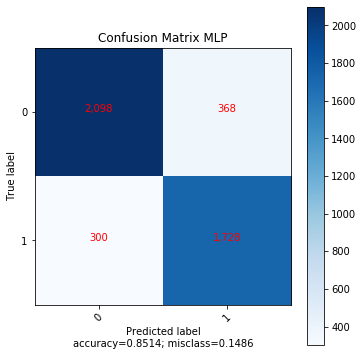

Precision: 0.851
Recall: 0.851
f1_micro: 0.851 

Precision: 0.850
Recall: 0.851
f1_macro: 0.850 



In [0]:
## First try

#parameters to check
threshold = [0, 1000, 2000, 80000]
hidden_layer_sizes = [(100,), (300,)]
activation = ['tanh', 'relu']
solver = ['adam', 'lbfgs']
max_iter = [200, 400]
learning_rate = ['constant', 'adaptive']
alpha = [1e-05, 1e-06]


params = dict(selector__threshold = threshold,
             mlp__hidden_layer_sizes = hidden_layer_sizes, 
             mlp__activation = activation, 
             mlp__solver = solver, 
             mlp__max_iter = max_iter,
             mlp__learning_rate = learning_rate, 
             mlp__alpha = alpha
             )


selector = VarianceThreshold()
scaler = StandardScaler()
sampler = RandomUnderSampler()
mlp = MLPClassifier()


pipe = Pipeline(steps=[('selector', selector), ('scaler', scaler), ('sampler', sampler), ('mlp', mlp)], memory='tmp')
estimator = GridSearchCV(pipe, params, cv=5, scoring='f1_macro', n_jobs=-1)




start_time = time.time()

estimator.fit(train, train_labels)
pred_mlp = estimator.predict(test)
print("time total: %s seconds" % (time.time() - start_time))

print(estimator.best_estimator_)
print(estimator.best_params_)


cnf_matrix_mlp = confusion_matrix(test_labels, pred_mlp)
print('confusion matrix\n', cnf_matrix_mlp)
plot_confusion_matrix(cnf_matrix_mlp, [0,1], 'MLP')

precision, recall, f1_micro_mlp, _ = precision_recall_fscore_support(test_labels, pred_mlp, average='micro')
print('Precision: %.3f\nRecall: %.3f\nf1_micro: %.3f \n' % (precision, recall, f1_micro_mlp))
precision, recall, f1_macro_mlp, _ = precision_recall_fscore_support(test_labels, pred_mlp, average='macro')
print('Precision: %.3f\nRecall: %.3f\nf1_macro: %.3f \n' % (precision, recall, f1_macro_mlp))


Από την παραπάνω εκτέλεση βλέπουμε ότι την καλύτερη απόδοση (**0.85** περίπου) έχει για:

*   activation = 'relu'
*   solver = 'adam'
*   learning_rate = 'constant'
*   alpha = 1e-06
*   threshold = 0 (διαλέγει το 0 και το μικρότερο variance είναι 1082, ενώ     εμείς ελέγξαμε 0,1000,2000,80000 για threshold. Οπότε χρειαζόμαστε όλες τις κολώνες)

Για max_iter και hidden_layer_sizes διαλέγει τις μεγαλύτερες τιμές που του δώσαμε (max_iter = 400, hidden_layer_sizes = (300,) ), οπότε δοκιμάζουμε και μερικές ακόμα μεγαλύτερες από τις προηγούμενες. Για το alpha παίρνει την μικρότερη τιμή (alpha=1e-06) άρα δοκιμάζουμε και μικρότερες:




time total: 541.9297261238098 seconds
Pipeline(memory='tmp',
         steps=[('selector', VarianceThreshold(threshold=0)),
                ('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('sampler',
                 RandomUnderSampler(random_state=None, replacement=False,
                                    sampling_strategy='auto')),
                ('mlp',
                 MLPClassifier(activation='relu', alpha=1e-06,
                               batch_size='auto', beta_1=0.9, beta_2=0.999,
                               early_stopping=False, epsilon=1e-08,
                               hidden_layer_sizes=(600,),
                               learning_rate='constant',
                               learning_rate_init=0.001, max_fun=15000,
                               max_iter=600, momentum=0.9, n_iter_no_change=10,
                               nesterovs_momentum=True, power_t=0.5,
                               random_sta

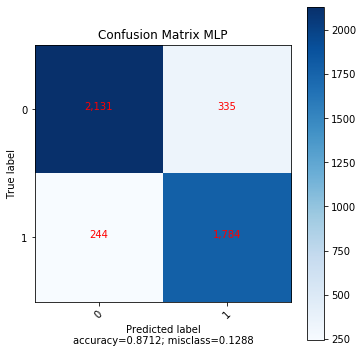

Precision: 0.871
Recall: 0.871
f1_micro: 0.871 

Precision: 0.870
Recall: 0.872
f1_macro: 0.870 



In [0]:
## Second try

#parameters to check
threshold = [0]
hidden_layer_sizes = [(300,), (400,), (600,)]
activation = ['relu']
solver = ['adam']
max_iter = [400, 600]
learning_rate = ['constant']
alpha = [1e-06, 1e-07]


params = dict(selector__threshold = threshold,
             mlp__hidden_layer_sizes = hidden_layer_sizes, 
             mlp__activation = activation, 
             mlp__solver = solver, 
             mlp__max_iter = max_iter,
             mlp__learning_rate = learning_rate, 
             mlp__alpha = alpha
             )


selector = VarianceThreshold()
scaler = StandardScaler()
sampler = RandomUnderSampler()
mlp = MLPClassifier()


pipe = Pipeline(steps=[('selector', selector), ('scaler', scaler), ('sampler', sampler), ('mlp', mlp)], memory='tmp')
estimator = GridSearchCV(pipe, params, cv=5, scoring='f1_macro', n_jobs=-1)




start_time = time.time()

estimator.fit(train, train_labels)
pred_mlp = estimator.predict(test)
print("time total: %s seconds" % (time.time() - start_time))

print(estimator.best_estimator_)
print(estimator.best_params_)


cnf_matrix_mlp = confusion_matrix(test_labels, pred_mlp)
print('confusion matrix\n', cnf_matrix_mlp)
plot_confusion_matrix(cnf_matrix_mlp, [0,1], 'MLP')

precision, recall, f1_micro_mlp, _ = precision_recall_fscore_support(test_labels, pred_mlp, average='micro')
print('Precision: %.3f\nRecall: %.3f\nf1_micro: %.3f \n' % (precision, recall, f1_micro_mlp))
precision, recall, f1_macro_mlp, _ = precision_recall_fscore_support(test_labels, pred_mlp, average='macro')
print('Precision: %.3f\nRecall: %.3f\nf1_macro: %.3f \n' % (precision, recall, f1_macro_mlp))


Το alpha δε μειώνεται άλλο, οπότε επιλέγουμε την τιμή 1e-06. Για max_iter και hidden_layer_sizes διαλέγει και πάλι τις μεγαλύτερες τιμές που του δώσαμε (max_iter = 600, hidden_layer_sizes = (600,) ). Αυξάνεται η απόδοση και γίνεται **0.87**

Πράττουμε παρόμοια και αυξάνουμε ακόμα περισσότερο τις δύο αυτές παραμέτρους:


/home/mike/jubyter/my_project_env/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


time total: 435.57453894615173 seconds
Pipeline(memory='tmp',
         steps=[('selector', VarianceThreshold(threshold=0)),
                ('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('sampler',
                 RandomUnderSampler(random_state=None, replacement=False,
                                    sampling_strategy='auto')),
                ('mlp',
                 MLPClassifier(activation='relu', alpha=1e-06,
                               batch_size='auto', beta_1=0.9, beta_2=0.999,
                               early_stopping=False, epsilon=1e-08,
                               hidden_layer_sizes=(800,),
                               learning_rate='constant',
                               learning_rate_init=0.001, max_fun=15000,
                               max_iter=600, momentum=0.9, n_iter_no_change=10,
                               nesterovs_momentum=True, power_t=0.5,
                               random_st

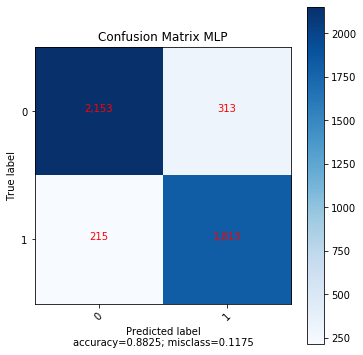

Precision: 0.883
Recall: 0.883
f1_micro: 0.883 

Precision: 0.881
Recall: 0.884
f1_macro: 0.882 



In [0]:
## Third try


#parameters to check
threshold = [0]
hidden_layer_sizes = [(600,), (800,)]
activation = ['relu']
solver = ['adam']
max_iter = [600, 900]
learning_rate = ['constant']
alpha = [1e-06]


params = dict(selector__threshold = threshold,
             mlp__hidden_layer_sizes = hidden_layer_sizes, 
             mlp__activation = activation, 
             mlp__solver = solver, 
             mlp__max_iter = max_iter,
             mlp__learning_rate = learning_rate, 
             mlp__alpha = alpha
             )


selector = VarianceThreshold()
scaler = StandardScaler()
sampler = RandomUnderSampler()
mlp = MLPClassifier()


pipe = Pipeline(steps=[('selector', selector), ('scaler', scaler), ('sampler', sampler), ('mlp', mlp)], memory='tmp')
estimator = GridSearchCV(pipe, params, cv=5, scoring='f1_macro', n_jobs=-1)




start_time = time.time()

estimator.fit(train, train_labels)
pred_mlp = estimator.predict(test)
print("time total: %s seconds" % (time.time() - start_time))

print(estimator.best_estimator_)
print(estimator.best_params_)


cnf_matrix_mlp = confusion_matrix(test_labels, pred_mlp)
print('confusion matrix\n', cnf_matrix_mlp)
plot_confusion_matrix(cnf_matrix_mlp, [0,1], 'MLP')

precision, recall, f1_micro_mlp, _ = precision_recall_fscore_support(test_labels, pred_mlp, average='micro')
print('Precision: %.3f\nRecall: %.3f\nf1_micro: %.3f \n' % (precision, recall, f1_micro_mlp))
precision, recall, f1_macro_mlp, _ = precision_recall_fscore_support(test_labels, pred_mlp, average='macro')
print('Precision: %.3f\nRecall: %.3f\nf1_macro: %.3f \n' % (precision, recall, f1_macro_mlp))


Με βάση τα παραπάνω αποτελέσματα, δεν αυξάνουμε περισσότερο το max_iter (το κρατάμε στην τιμή 600). Δοκιμάζουμε να αυξήσουμε ακόμα περισσότερο το hidden_layer_sizes και προσθέτουμε PCA:

/home/mike/jubyter/my_project_env/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


time total: 1389.4931437969208 seconds
Pipeline(memory='tmp',
         steps=[('selector', VarianceThreshold(threshold=0)),
                ('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('sampler',
                 RandomUnderSampler(random_state=None, replacement=False,
                                    sampling_strategy='auto')),
                ('pca',
                 PCA(copy=True, iterated_power='auto', n_components=14,
                     random_state=None, svd_solver='auto', tol=0.0,
                     whiten=False)),...
                               batch_size='auto', beta_1=0.9, beta_2=0.999,
                               early_stopping=False, epsilon=1e-08,
                               hidden_layer_sizes=(1000,),
                               learning_rate='constant',
                               learning_rate_init=0.001, max_fun=15000,
                               max_iter=600, momentum=0.9, n_iter_no_ch

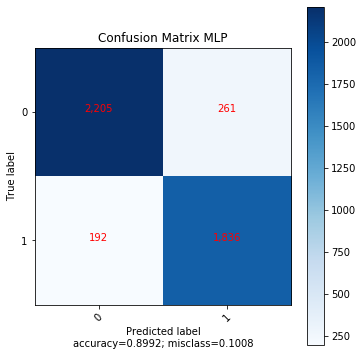

Precision: 0.899
Recall: 0.899
f1_micro: 0.899 

Precision: 0.898
Recall: 0.900
f1_macro: 0.899 



In [0]:
## Fourth try


#parameters to check
n_components = [1, 5, 8, 10, 13, 14]
threshold = [0]
hidden_layer_sizes = [(600,), (800,), (1000,)]
activation = ['relu']
solver = ['adam']
max_iter = [600]
learning_rate = ['constant']
alpha = [1e-06]


params = dict(selector__threshold = threshold,
             pca__n_components = n_components,
             mlp__hidden_layer_sizes = hidden_layer_sizes, 
             mlp__activation = activation, 
             mlp__solver = solver, 
             mlp__max_iter = max_iter,
             mlp__learning_rate = learning_rate, 
             mlp__alpha = alpha
             )


selector = VarianceThreshold()
scaler = StandardScaler()
sampler = RandomUnderSampler()
pca = PCA()
mlp = MLPClassifier()


pipe = Pipeline(steps=[('selector', selector), ('scaler', scaler), ('sampler', sampler), ('pca', pca), ('mlp', mlp)], memory='tmp')
estimator = GridSearchCV(pipe, params, cv=5, scoring='f1_macro', n_jobs=-1)




start_time = time.time()

estimator.fit(train, train_labels)
pred_mlp = estimator.predict(test)
print("time total: %s seconds" % (time.time() - start_time))

print(estimator.best_estimator_)
print(estimator.best_params_)


cnf_matrix_mlp = confusion_matrix(test_labels, pred_mlp)
print('confusion matrix\n', cnf_matrix_mlp)
plot_confusion_matrix(cnf_matrix_mlp, [0,1], 'MLP')

precision, recall, f1_micro_mlp, _ = precision_recall_fscore_support(test_labels, pred_mlp, average='micro')
print('Precision: %.3f\nRecall: %.3f\nf1_micro: %.3f \n' % (precision, recall, f1_micro_mlp))
precision, recall, f1_macro_mlp, _ = precision_recall_fscore_support(test_labels, pred_mlp, average='macro')
print('Precision: %.3f\nRecall: %.3f\nf1_macro: %.3f \n' % (precision, recall, f1_macro_mlp))


Με τη χρήση του PCA έχουμε ακόμα καλύτερη απόδοση και βλέπουμε ότι παίρνει τη μέγιστη τιμή το n_components. Το σκορ τώρα είναι **0.9** περίπου και επειδή πάλι το hidden_layer_sizes παίρνει τη μέγιστη τιμή, δοκιμάζουμε ακόμα μεγαλύτερες τιμές:

time total: 1598.814912557602 seconds
Pipeline(memory='tmp',
         steps=[('selector', VarianceThreshold(threshold=0)),
                ('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('sampler',
                 RandomUnderSampler(random_state=None, replacement=False,
                                    sampling_strategy='auto')),
                ('pca',
                 PCA(copy=True, iterated_power='auto', n_components=14,
                     random_state=None, svd_solver='auto', tol=0.0,
                     whiten=False)),...
                               batch_size='auto', beta_1=0.9, beta_2=0.999,
                               early_stopping=False, epsilon=1e-08,
                               hidden_layer_sizes=(5000,),
                               learning_rate='constant',
                               learning_rate_init=0.001, max_fun=15000,
                               max_iter=600, momentum=0.9, n_iter_no_cha

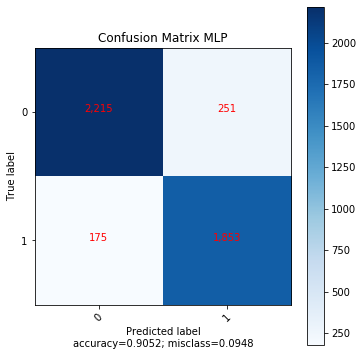

Precision: 0.905
Recall: 0.905
f1_micro: 0.905 

Precision: 0.904
Recall: 0.906
f1_macro: 0.905 



In [0]:
## Fifth try


#parameters to check
n_components = [14]
threshold = [0]
hidden_layer_sizes = [(1000,), (1500,), (2000,), (5000,)]
activation = ['relu']
solver = ['adam']
max_iter = [600]
learning_rate = ['constant']
alpha = [1e-06]


params = dict(selector__threshold = threshold,
             pca__n_components = n_components,
             mlp__hidden_layer_sizes = hidden_layer_sizes, 
             mlp__activation = activation, 
             mlp__solver = solver, 
             mlp__max_iter = max_iter,
             mlp__learning_rate = learning_rate, 
             mlp__alpha = alpha
             )


selector = VarianceThreshold()
scaler = StandardScaler()
sampler = RandomUnderSampler()
pca = PCA()
mlp = MLPClassifier()


pipe = Pipeline(steps=[('selector', selector), ('scaler', scaler), ('sampler', sampler), ('pca', pca), ('mlp', mlp)], memory='tmp')
estimator = GridSearchCV(pipe, params, cv=5, scoring='f1_macro', n_jobs=-1)




start_time = time.time()

estimator.fit(train, train_labels)
pred_mlp = estimator.predict(test)
print("time total: %s seconds" % (time.time() - start_time))

print(estimator.best_estimator_)
print(estimator.best_params_)


cnf_matrix_mlp = confusion_matrix(test_labels, pred_mlp)
print('confusion matrix\n', cnf_matrix_mlp)
plot_confusion_matrix(cnf_matrix_mlp, [0,1], 'MLP')

precision, recall, f1_micro_mlp, _ = precision_recall_fscore_support(test_labels, pred_mlp, average='micro')
print('Precision: %.3f\nRecall: %.3f\nf1_micro: %.3f \n' % (precision, recall, f1_micro_mlp))
precision, recall, f1_macro_mlp, _ = precision_recall_fscore_support(test_labels, pred_mlp, average='macro')
print('Precision: %.3f\nRecall: %.3f\nf1_macro: %.3f \n' % (precision, recall, f1_macro_mlp))


Επομένως, οι καλύτερες τιμές των μετρικών (**0.905**) πετυχαίνονται από την 5η προσπάθειά μας και είναι:

*   activation = 'relu'
*   solver = 'adam'
*   learning_rate = 'constant'
*   alpha = 1e-06
*   threshold = 0
*   hidden_layer_sizes = (5000,)
*   max_iter = 600
*   n_components = 14

Επιλέγουμε να μην αυξήσουμε παραπάνω το hidden_layer_sizes λόγω αυξημένης καθυστέρησης.

### Αποτελέσματα / Συγκρίσεις

Θα κάνουμε εκτιμήσεις χρησιμοποιόντας τις βελτιστοποιημένες διαδικασίες για κάθε ταξινομητή.

In [0]:
# array to hold scores

f1_micro_imporved_scores = []
f1_macro_imporved_scores = []

Ξεκινάμε με τον GNB:

Συνολικός χρόνος fit και predict: 0.07728290557861328 seconds
confusion matrix
 [[ 173 2293]
 [  49 1979]]


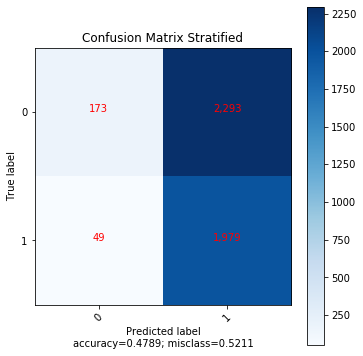

Precision: 0.479
Recall: 0.479
f1_micro: 0.479 

Precision: 0.621
Recall: 0.523
f1_macro: 0.378 



In [0]:
# {'pca__n_components': 14, 'selector__threshold': 0.0}
scaler = StandardScaler()
pca = PCA(n_components=14) # ο pca 
clf = GaussianNB() # η παράμετρος n_jobs = 1 χρησιμοποιεί όλους τους πυρήνες του υπολογιστή
pipe = Pipeline(steps=[('scaler', scaler), ('pca', pca), ('gnb', clf)], memory = 'tmp')

start_time = time.time()
pipe.fit(train, train_labels)
preds = pipe.predict(test)
print("Συνολικός χρόνος fit και predict: %s seconds" % (time.time() - start_time))

cnf_matrix = confusion_matrix(test_labels, preds)
print('confusion matrix\n', cnf_matrix)
plot_confusion_matrix(cnf_matrix, [0,1], 'Stratified')

precision, recall, f1_micro, _ = precision_recall_fscore_support(test_labels, preds, average='micro')
print('Precision: %.3f\nRecall: %.3f\nf1_micro: %.3f \n' % (precision, recall, f1_micro))
precision, recall, f1_macro, _ = precision_recall_fscore_support(test_labels, preds, average='macro')
print('Precision: %.3f\nRecall: %.3f\nf1_macro: %.3f \n' % (precision, recall, f1_macro))

f1_micro_imporved_scores.append(f1_micro)
f1_macro_imporved_scores.append(f1_macro)

Συνεχίζουμε με τον kNN:

Συνολικός χρόνος fit και predict: 0.40674805641174316 seconds
confusion matrix
 [[2406   60]
 [  48 1980]]


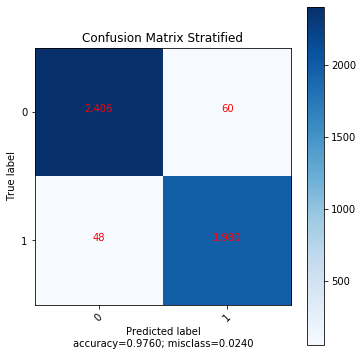

Precision: 0.976
Recall: 0.976
f1_micro: 0.976 

Precision: 0.976
Recall: 0.976
f1_macro: 0.976 



In [0]:
# {'kNN__metric': 'minkowski', 'kNN__n_neighbors': 1, 'kNN__weights': 'uniform', 'selector__threshold': 0.0}

scaler = StandardScaler()
# pca = PCA()
ros = RandomOverSampler()
clf = KNeighborsClassifier(n_neighbors= 1, metric= 'minkowski', weights='uniform', n_jobs=-1) # η παράμετρος n_jobs = 1 χρησιμοποιεί όλους τους πυρήνες του υπολογιστή
pipe = Pipeline(steps=[('selector', selector), ('sampler', ros), ('kNN', clf)], memory = 'tmp')

start_time = time.time()
pipe.fit(train, train_labels)
preds = pipe.predict(test)
print("Συνολικός χρόνος fit και predict: %s seconds" % (time.time() - start_time))

cnf_matrix = confusion_matrix(test_labels, preds)
print('confusion matrix\n', cnf_matrix)
plot_confusion_matrix(cnf_matrix, [0,1], 'Stratified')

precision, recall, f1_micro, _ = precision_recall_fscore_support(test_labels, preds, average='micro')
print('Precision: %.3f\nRecall: %.3f\nf1_micro: %.3f \n' % (precision, recall, f1_micro))
precision, recall, f1_macro, _ = precision_recall_fscore_support(test_labels, preds, average='macro')
print('Precision: %.3f\nRecall: %.3f\nf1_macro: %.3f \n' % (precision, recall, f1_macro))

f1_micro_imporved_scores.append(f1_micro)
f1_macro_imporved_scores.append(f1_macro)

Τέλος, τρέχουμε τον MLP με την βελτιστοποιημένη διαδικασία:

Συνολικός χρόνος fit και predict: 1013.5958461761475 seconds
confusion matrix
 [[2235  231]
 [ 169 1859]]


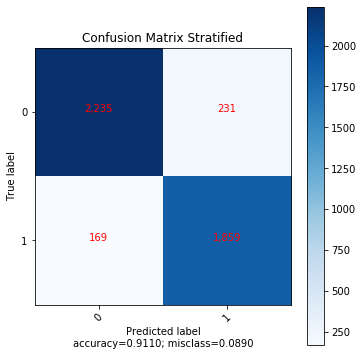

Precision: 0.911
Recall: 0.911
f1_micro: 0.911 

Precision: 0.910
Recall: 0.911
f1_macro: 0.910 



In [0]:
# {'mlp__activation': 'relu', 'mlp__alpha': 1e-06, 'mlp__hidden_layer_sizes': (5000,), 'mlp__learning_rate': 'constant', 'mlp__max_iter': 600, 'mlp__solver': 'adam', 'pca__n_components': 14, 'selector__threshold': 0}
# https://stackoverflow.com/questions/21986194/how-to-pass-dictionary-items-as-function-arguments-in-python/21986301

scaler = StandardScaler()
sampler = RandomUnderSampler()
pca = PCA(n_components=14)
mlp = MLPClassifier(hidden_layer_sizes=5000, activation= 'relu', alpha=1e-06,  learning_rate='constant', max_iter=600, solver='adam')

pipe = Pipeline(steps=[('scaler', scaler), ('sampler', sampler), ('pca', pca), ('mlp', mlp)], memory='tmp')

start_time = time.time()
pipe.fit(train, train_labels)
preds = pipe.predict(test)
print("Συνολικός χρόνος fit και predict: %s seconds" % (time.time() - start_time))

cnf_matrix = confusion_matrix(test_labels, preds)
print('confusion matrix\n', cnf_matrix)
plot_confusion_matrix(cnf_matrix, [0,1], 'Stratified')

precision, recall, f1_micro, _ = precision_recall_fscore_support(test_labels, preds, average='micro')
print('Precision: %.3f\nRecall: %.3f\nf1_micro: %.3f \n' % (precision, recall, f1_micro))
precision, recall, f1_macro, _ = precision_recall_fscore_support(test_labels, preds, average='macro')
print('Precision: %.3f\nRecall: %.3f\nf1_macro: %.3f \n' % (precision, recall, f1_macro))

f1_micro_imporved_scores.append(f1_micro)
f1_macro_imporved_scores.append(f1_macro)

Ας συγκρίνουμε τα αποτελέσματα των αλγορίθμων, τόσο μεταξύ τους όσο και με τις προηγούμενες υλοποιήσεις (ερώτημα Γ):

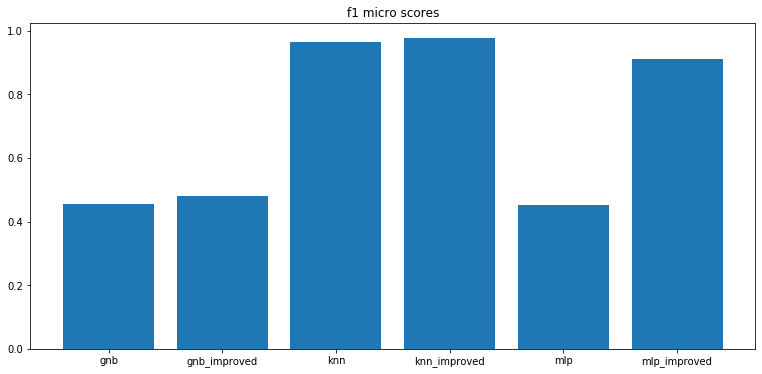

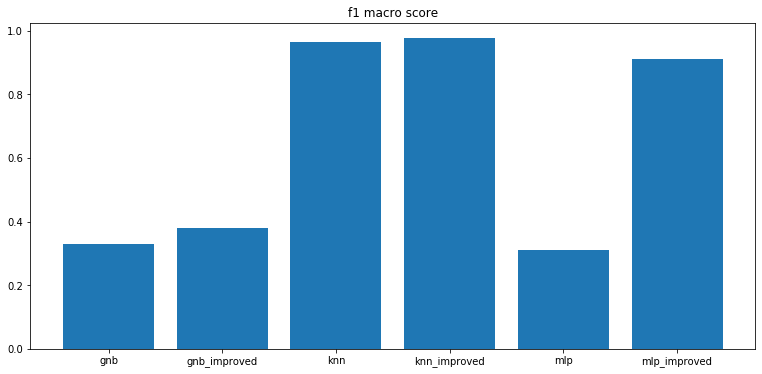

In [0]:
# import matplotlib.pyplot as plt
f1_micro_both = [f1_micro_total[5], f1_micro_imporved_scores[0], f1_micro_total[6], f1_micro_imporved_scores[1], f1_micro_total[7], f1_micro_imporved_scores[2]] # both staring and improved results
f1_macro_both = [f1_macro_total[5], f1_macro_imporved_scores[0], f1_macro_total[6], f1_macro_imporved_scores[1], f1_macro_total[7], f1_macro_imporved_scores[2]] # both staring and improved results

classifiers = ['gnb', 'gnb_improved', 'knn', 'knn_improved', 'mlp', 'mlp_improved']

fig, ax = plt.subplots(figsize=(13,6))
ax.bar(classifiers, f1_micro_both, width=0.8)
ax.set_title('f1 micro scores')

fig, ax = plt.subplots(figsize=(13,6))
ax.bar(classifiers, f1_macro_both, width=0.8)
ax.set_title('f1 macro score')

plt.show()

0.9759679572763685 0.9650645304850912
[1.1445714896005308, 1.0114349021535523, 2.92771220455678]


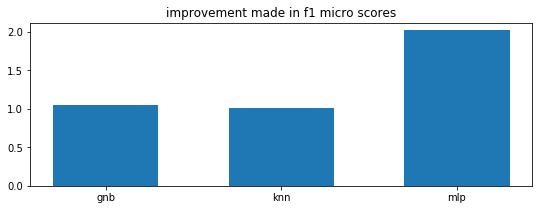

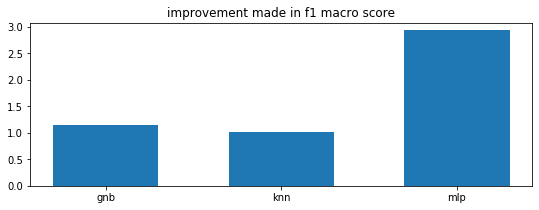

In [0]:
f1_micro_improvement_made = [f1_micro_both[1]/f1_micro_both[0], f1_micro_both[3]/f1_micro_both[2], f1_micro_both[5]/f1_micro_both[4]]
f1_macro_improvement_made = [f1_macro_both[1]/f1_macro_both[0], f1_macro_both[3]/f1_macro_both[2], f1_macro_both[5]/f1_macro_both[4]]

print(f1_micro_both[3], f1_micro_both[2])
print(f1_macro_improvement_made)

classifiers = ['gnb', 'knn', 'mlp']

fig, ax = plt.subplots(figsize=(9,3))
ax.bar(classifiers, f1_micro_improvement_made, width=0.6)
ax.set_title('improvement made in f1 micro scores')

fig, ax = plt.subplots(figsize=(9,3))
ax.bar(classifiers, f1_macro_improvement_made, width=0.6)
ax.set_title('improvement made in f1 macro score')

plt.show()

Παρατηρούμε πως καταφέραμε να βελτιστοποιήσουμε όλους τους αλγορίθμους. 
- Ο knn πετύχαινε εξ αρχής κορυφαία αποτελέσματα συνεπώς και τα περιθώρια βελτίωσης ήταν πολύ μικρά.
- Ο gnb σημείωσε αρκετή βελτίωση στις προβλέψεις του χωρίς ωστόσο να καταφέρει να πετύχει καλά αποτελέσματα ταξινόμησης στα test δεδομένα.
- Τέλος, όπως ήταν αναμενόμενο, με τις βέλτιστες παραμέτρους ο mlp σημείωσε τεράστια πρόοδο και η ταξινόμηση που κατάφερε είναι πολύ καλή, σχεδόν ισάξια με αυτή του knn (με πολύ μεγαλύτερες χρονικές απαιτήσεις ωστόσο).